# Task-2

# perfoming a geographical analysis of the restuarant in the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install folium

In [4]:
import folium

In [5]:
path=r"C:\Users\dell\Data science\cognifyz\Dataset  - Dataset .csv"
df=pd.read_csv(path)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
#using group by function, grouping the city column
grouped_by_city=df.groupby('City')

In [7]:
#count of restaurant 
restaurant_count = grouped_by_city['Restaurant Name'].count()

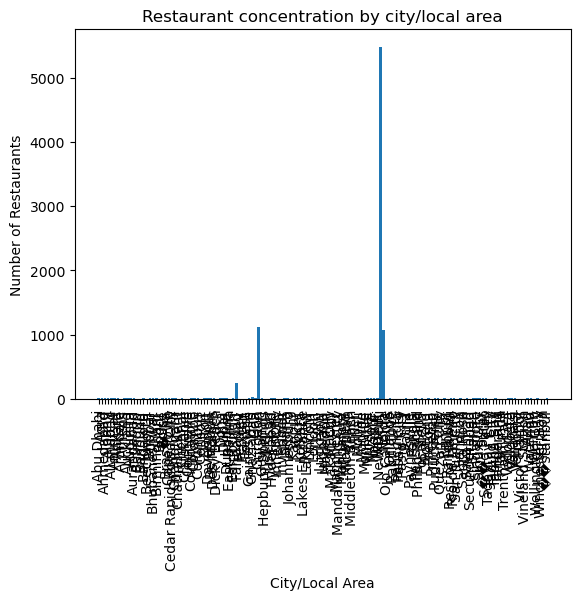

In [8]:
import matplotlib.pyplot as plt
plt.bar(restaurant_count.index,restaurant_count.values)
plt.xlabel('City/Local Area')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant concentration by city/local area')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Forming into Clusters
from sklearn.cluster import KMeans 

X = df[['Latitude', 'Longitude']] 
k = 5 
kmeans = KMeans(n_clusters=k, random_state=0) 
cluster_labels = kmeans.fit_predict(X) 
df['Cluster'] = cluster_labels

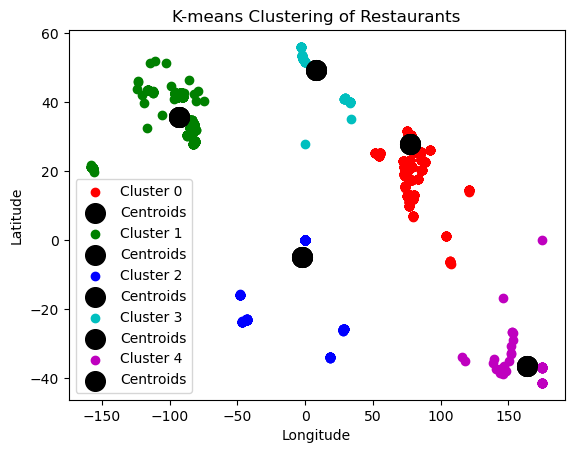

In [10]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 

for cluster_num in range(k): 
    cluster_data = df[df['Cluster'] == cluster_num] 
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], 
                c=colors[cluster_num], label=f'Cluster {cluster_num}') 
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
                s=200, c='black', label='Centroids') 
    plt.xlabel('Longitude') 
    plt.ylabel('Latitude') 
    plt.title('K-means Clustering of Restaurants') 
    plt.legend() 
plt.show()

$Average$ $rating$ by $city /locality$

In [11]:
average_ratings_by_city = grouped_by_city['Aggregate rating'].mean() 
print(average_ratings_by_city)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


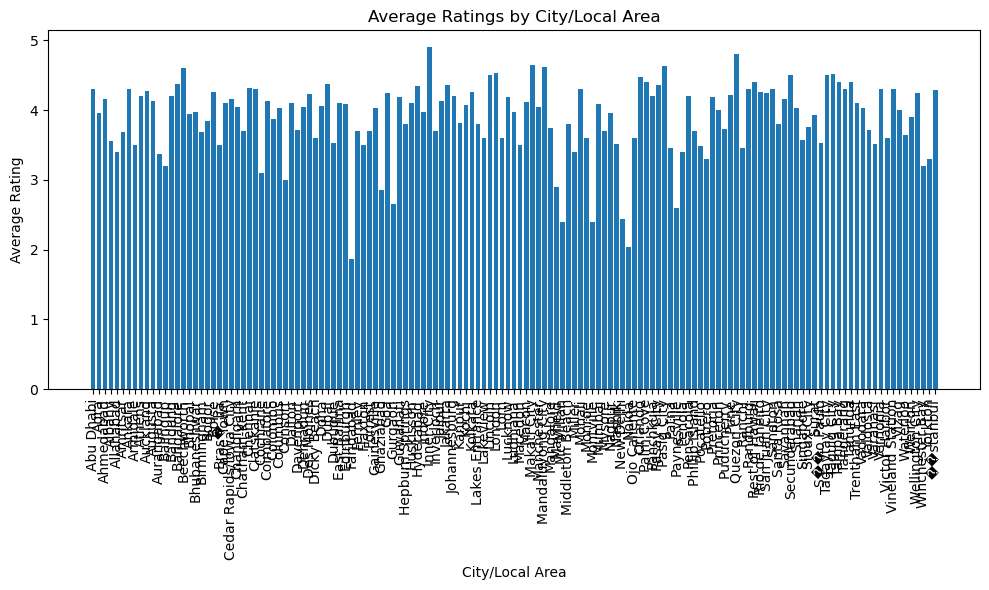

In [14]:
plt.figure(figsize=(10, 6)) 

plt.bar(average_ratings_by_city.index, average_ratings_by_city.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Average Rating') 
plt.title('Average Ratings by City/Local Area') 
plt.xticks(rotation=90) # Rotate x-axis labels for better readability 
plt.tight_layout() 
plt.show()

In [15]:
plt.figure(figsize=(10, 6)) 

for city, cuisines in popular_cuisines_by_city.items(): 
    plt.bar(city, ', '.join(cuisines)) 
    plt.xlabel('City/Local Area') 
    plt.ylabel('Popular Cuisines') 
    plt.title('Popular Cuisines by City/Local Area') 
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability 
    plt.tight_layout()  
    
plt.show()

NameError: name 'popular_cuisines_by_city' is not defined

<Figure size 1000x600 with 0 Axes>

# price range analysis by city /locality

In [16]:
common_price_range_by_city = grouped_by_city['Price range'].agg(lambda x: x.mode().iloc[0]) 
print(common_price_range_by_city)

City
Abu Dhabi          4
Agra               2
Ahmedabad          3
Albany             1
Allahabad          3
                  ..
Weirton            2
Wellington City    4
Winchester Bay     2
Yorkton            2
��stanbul          3
Name: Price range, Length: 141, dtype: int64


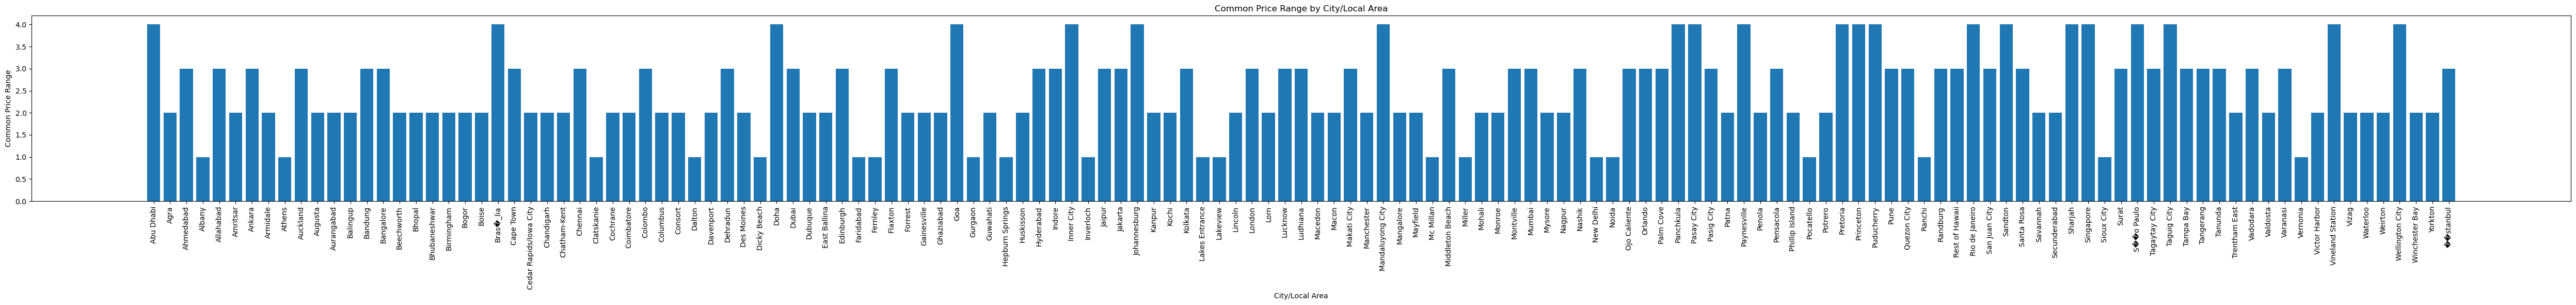

In [17]:
plt.figure(figsize=(50, 6)) 

plt.bar(common_price_range_by_city.index, common_price_range_by_city.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Common Price Range') 
plt.title('Common Price Range by City/Local Area') 
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

# cuisine diversity

In [19]:
grouped_by_city = df.groupby('City') 
cuisine_diversity = grouped_by_city['Cuisines'].apply(lambda x: len(set(x))) 
print(cuisine_diversity)

City
Abu Dhabi          17
Agra               15
Ahmedabad          21
Albany             17
Allahabad          18
                   ..
Weirton             1
Wellington City    17
Winchester Bay      1
Yorkton             1
��stanbul          11
Name: Cuisines, Length: 141, dtype: int64


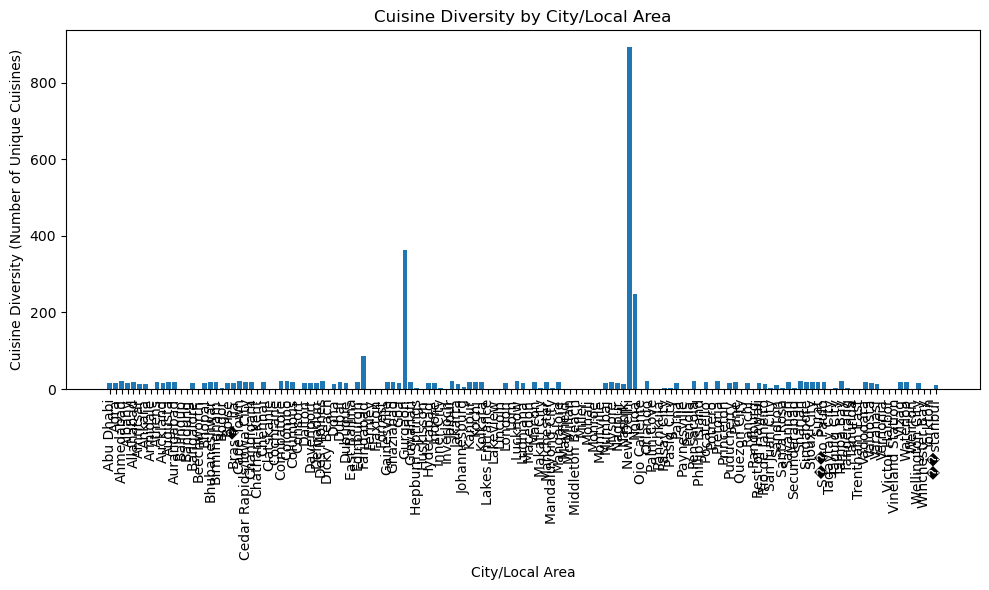

In [20]:
plt.figure(figsize=(10, 6)) 

plt.bar(cuisine_diversity.index, cuisine_diversity.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Cuisine Diversity (Number of Unique Cuisines)') 
plt.title('Cuisine Diversity by City/Local Area') 
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

$conclusion$
- as i performed a geographical analysis of the restaurant based on average ratings, cuisines ratings and cuisines diversity by locality/city